## Red Neuronal Clasificación - Personas

In [1]:
# Librerias
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [67]:
# Cargamos datos
np.random.seed(123)
Personas = fetch_lfw_people(min_faces_per_person=10, resize=0.4)

In [68]:
# Generamos datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(Personas.data, Personas.target, 
                                                    test_size=0.20, random_state=42)

In [70]:
# Exploremos datos
[y_train.size, y_test.size]

[3459, 865]

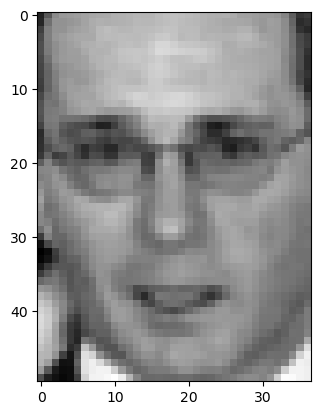

In [72]:
# Exploremos datos
Foto = X_train[0].reshape(50,37)
plt.imshow(Foto, cmap='gray')
plt.show()

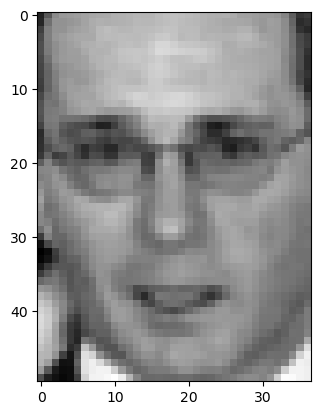

Clase:  3
Nombre:  Alvaro Uribe


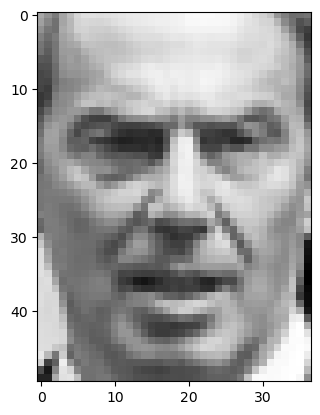

Clase:  149
Nombre:  Tony Blair


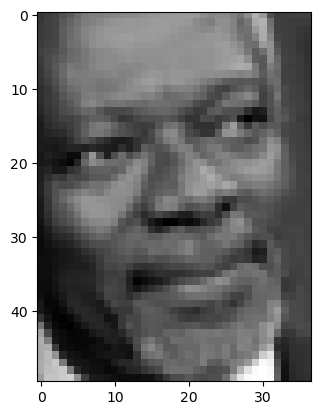

Clase:  89
Nombre:  Kofi Annan


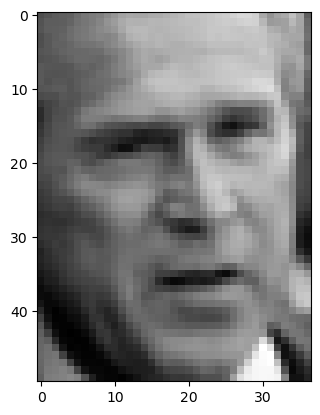

Clase:  35
Nombre:  George W Bush


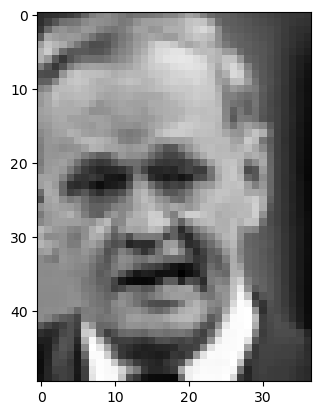

Clase:  61
Nombre:  Jean Chretien


In [73]:
for i in range(5):
    Foto = X_train[i].reshape(50,37)
    plt.imshow(Foto, cmap='gray')
    plt.show()
    print("Clase: ", y_train[i])
    print("Nombre: ",Personas.target_names[y_train[i]])

In [74]:
# Modelo MLP
mlp = MLPClassifier(
    hidden_layer_sizes = (100, 25), # Entrada (1850), 100, 25, 11
    activation = "relu",
    max_iter = 300,
    solver = "sgd"
)

In [75]:
# Entrenamiento
mlp.fit(X_train,y_train)

/Users/ivan/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 25), max_iter=300, solver='sgd')

In [76]:
mlp.out_activation_

'softmax'

In [59]:
mlp.predict(X_test[6].reshape(1,-1))

array([5])

In [60]:
mlp.predict_proba(X_test[6].reshape(1,-1))

array([[8.6524216e-07, 5.3486254e-08, 7.7173574e-08, 1.1963115e-04,
        4.3676153e-02, 8.8277137e-01, 1.9190002e-03, 8.2283520e-08,
        8.3368141e-05, 1.9011970e-04, 4.9454466e-05, 7.1189888e-02]],
      dtype=float32)

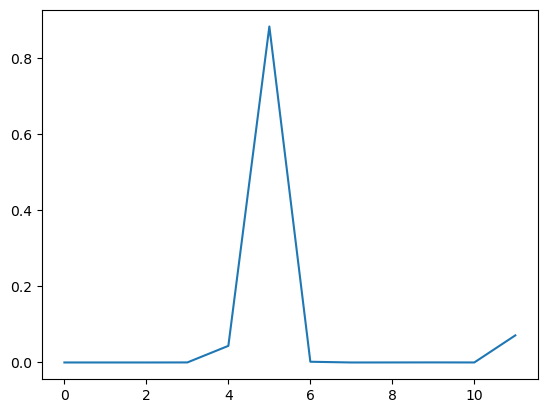

In [61]:
plt.plot(mlp.predict_proba(X_test[6].reshape(1,-1))[0])

In [62]:
print("Nombre: ",Personas.target_names[5])

Nombre:  Hugo Chavez


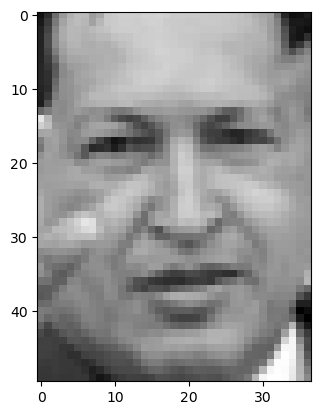

In [63]:
Foto = X_test[6].reshape(50,37)
plt.imshow(Foto, cmap='gray')
plt.show()

In [77]:
y_pred = mlp.predict(X_test)
score  = accuracy_score(y_test, y_pred)
print("Score : ", score)

Score :  0.25780346820809247


In [78]:
y_test

array([ 64,   6,  75,  96,  51, 149, 147,  68,  49,  83,  23,  35,  66,
        29, 115, 102,  65, 127, 136, 108,  36, 134,  16,  29, 104,  95,
        85,  68,  49, 141, 142,  78, 126,  12, 107,  35, 111,  23,  11,
       149,  39,  35,  73,  29,   6,  19,  69, 115, 134,  93, 137,  29,
       134,  75,  54,  65,  32, 141,  35,  44,  35,  58,  85,  23,  79,
       129, 149,  97,  36,  23,  49, 105, 133,  58,  49,  65,  36,  85,
        32, 149, 149, 103,  23, 122, 116,  25,  85, 134, 100, 148,  35,
        35,  66,  35,  50,  35,  90,  72, 141,  48,  35,  79, 118, 152,
         8, 152,  23,  35,  64, 127,  40,  23,  36,  92,  71,  75, 154,
        12,  66,  35,  61,  60,  85,  34, 131, 137, 126,  35,  35,  97,
       129,  35,  35, 144,  35,   3,  35,   4,  12,   4,  57, 149, 149,
        35, 139, 124,  24, 122,  35,  11,   3,  86,  49,  35,  35, 112,
        69,  29,  65, 153,  36,  49,  48,  11,  43, 152,  12, 146, 132,
       113,  35, 153, 153,  36, 138, 128,  35,  36,  35,  22, 14

In [79]:
y_pred

array([ 35,   5,  61,  49,  23, 149,  91,  61,  85,  49,  23,  35,   7,
        29, 149,   7,  65,  35,  11,  91,  36, 134,  95,  23,  35,  36,
        85, 149, 149,  99, 142,  23,  23,  49,  36,  35,  85, 149,  23,
       149,  65,  35, 149,  29,  23,  23,  68,  65,   2,  35,  11,  35,
        23,  23,   2,  35,  23,  99,  35,  54,  35,  29,  85,  23,  29,
         2, 149,  95,  36,  23,  36,  37,  37, 149,  37,  65,  85,  85,
        35, 149, 149, 149,  23,  23,  36,  35,  35, 134,  54,  54,  35,
        73,   2,  35, 149,  35,  35,  35,  99,  49,  35,  61, 149,  36,
        35, 149,  23,  35,  85,  35, 149,  61,  36,  35,  29,  35,  61,
        54,  37,  23,  61,  36,  85,  35,  29,  36,  23,  35,  35,  23,
         2,  35,  35,  29,  35, 149,  35,  37,  35,  35,  23,   5,  54,
        35,  23,  29,  49,  36,  35,  11, 149, 119,  35,  35,  35, 149,
        61,  29,  35,  29,  36,  95,  85,  23,  73, 149,  36,  35,  37,
        37,  35, 149,  23,  36,  35, 119,  35, 149,  35,  35,  5